![Alt text](./SALVAGE.jpg)

# Welcome to the SALVAGE tutorial!

The SDSS-ALMA Legacy Value Archival Gas Exploration (SALVAGE) dataset combines optical data products from the Sloan Digital Sky Survey (SDSS) and molecular gas measurements from the Atacama Large (sub-)Millimeter Array (ALMA) archive to produce a sample of 277 “semi-resolved” galaxies.

This notebook introduces example code for the following:

1. [Accessing SALVAGE data from the public repository](#1.-Accessing-SALVAGE-data-from-the-public-repository)
2. [Applying quality assurance selection criteria](#2.-Applying-quality-assurance-selection-criteria)
3. [Visualizing moment maps](#3.-Visualizing-moment-maps)
4. [Making higher-order products](#4.-Making-higher-order-products)
5. [Using the semi-resolved products for science](#5.-Using-the-semi-resolved-products-for-science)
   

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import add_beam, add_scalebar

## 1. Accessing SALVAGE data from the public repository

The data is currently available on [CANFAR](https://www.canfar.net/storage/vault/list/salvage/data_release_18-08-25). Let's download the full catalogue (salvage_pub.csv) and open it as a pandas dataframe.

Best practice for interfacing with data on CANFAR is to use the vos package.

In [2]:
! pip install vos

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! vls vos:salvage/data_release_18-08-25/

SALVAGE.README
atlas
cubes
moments
qa_failed
salvage_pub.csv


In [4]:
! vcp vos:salvage/data_release_18-08-25/salvage_pub.csv ./

If vos isn't working, you can navigate to the file on the CANFAR API and access with wget or downloading the file manually.

In [5]:
! wget https://ws-cadc.canfar.net/minoc/files/dXJpPWNhZGM6dmF1bHQvMTcxYmFiNjUtYzhiZC00OTJjLTg0MTktMTI4Y2Y3MTM2YzU5JmdudD1SZWFkR3JhbnQmc3ViPTM4NTU5ODky~O7-RhMi5aCQNBxfsyBL6faTE5kSyjaofJPU4faDKsCWL66b3OxbQUwxb5ywg9buaLHAlQh6cBIQUq2VXCqBSkmBRy3o9ChfDfgB9ASLffuCuusDGppw_aKQFpXIdauVxj15ibbJI4oiptnF4lIv6gDbckEBPPZhgnrR7otlUqf-sj-GIwYnCtjlswWBv6QHPrVAvdrzXVPuHxqyv0epNJflFw0qwC9HsAhaWzZ5Dozx1C-D7DGmvZmP-tEH6Ai-RIn6hMAJbKNUNUQhqM6kLe5dAPNPzxaI8JCsudh7RkmTtrhvl_lr39jIT8qXclV9HWu-od48XNqaQTLGBHbrKG9ySYMM_3BKBqed6gUldHE3dEc8sRkIReVgepHWaYaDJ0NyfnCp7lPvyWdrSPciPXErVmxivfVizgJC6Sil7zflL_mdpNh5HPq9RuebwxzpIxjTZ3jP80NeEl2ae1i4eE_B41kJA7g5CmfZ1KFk8SOQ_d6zPlMxSOmrSRnPS1ViV-DxhUaxgoQ6as8-XboySbnuJPVhkrtuG3pWzYQcRR_z-J3ql0mAiD-QqLJDXCHDhxqS9yHajIaKF486SJCFXIy0LuvawTHY_vXNYnGb7brNoDvXQTm4zlVr1VgoAJRcsnguJRUhZltIyYzNLqI-E6e2NLPYqUfX1fS6AOi6mpG4=/cadc:vault/171bab65-c8bd-492c-8419-128cf7136c59:fo/salvage_pub.csv

--2025-11-05 23:53:09--  https://ws-cadc.canfar.net/minoc/files/dXJpPWNhZGM6dmF1bHQvMTcxYmFiNjUtYzhiZC00OTJjLTg0MTktMTI4Y2Y3MTM2YzU5JmdudD1SZWFkR3JhbnQmc3ViPTM4NTU5ODky~O7-RhMi5aCQNBxfsyBL6faTE5kSyjaofJPU4faDKsCWL66b3OxbQUwxb5ywg9buaLHAlQh6cBIQUq2VXCqBSkmBRy3o9ChfDfgB9ASLffuCuusDGppw_aKQFpXIdauVxj15ibbJI4oiptnF4lIv6gDbckEBPPZhgnrR7otlUqf-sj-GIwYnCtjlswWBv6QHPrVAvdrzXVPuHxqyv0epNJflFw0qwC9HsAhaWzZ5Dozx1C-D7DGmvZmP-tEH6Ai-RIn6hMAJbKNUNUQhqM6kLe5dAPNPzxaI8JCsudh7RkmTtrhvl_lr39jIT8qXclV9HWu-od48XNqaQTLGBHbrKG9ySYMM_3BKBqed6gUldHE3dEc8sRkIReVgepHWaYaDJ0NyfnCp7lPvyWdrSPciPXErVmxivfVizgJC6Sil7zflL_mdpNh5HPq9RuebwxzpIxjTZ3jP80NeEl2ae1i4eE_B41kJA7g5CmfZ1KFk8SOQ_d6zPlMxSOmrSRnPS1ViV-DxhUaxgoQ6as8-XboySbnuJPVhkrtuG3pWzYQcRR_z-J3ql0mAiD-QqLJDXCHDhxqS9yHajIaKF486SJCFXIy0LuvawTHY_vXNYnGb7brNoDvXQTm4zlVr1VgoAJRcsnguJRUhZltIyYzNLqI-E6e2NLPYqUfX1fS6AOi6mpG4=/cadc:vault/171bab65-c8bd-492c-8419-128cf7136c59:fo/salvage_pub.csv
Resolving ws-cadc.canfar.net (ws-cadc.canfar.net)... 132.246.217.37
Connecting 

Now let's open the file as a pandas dataframe.

In [6]:
data = pd.read_csv('./salvage_pub.csv')
data

,Unnamed: 0,objID,source_name,project_code,year,ra,dec,z,rpetro,resolution,...,mstar_total,mstar_inner,mstar_outer,sfr_total,sfr_inner,sfr_outer,delta_sfr,pEdgeOn,qa_flag,edgeon_flag
0,0,587726033335550094,Abell,2011.0.00374.S,2011,210.258631,2.878469,0.251876,2.91803,1.333456,...,11.69110,11.14770,11.544704,1.950570,1.815480,1.377613,0.501390,NaN,0,0
1,1,587741490891325518,587741490891325518_8241-3704,2018.1.00541.S,2018,126.568894,17.362436,0.065923,4.65495,1.802884,...,10.96410,10.15220,10.891365,0.873275,0.734712,0.309697,0.089103,0.03,0,0
2,2,587722984441250023,HATLAS_J143336.7+005042,2017.1.00025.S,2017,218.403317,0.845238,0.069836,1.43384,1.055615,...,10.20370,9.85969,9.941777,0.207182,0.090812,-0.421648,-0.055840,NaN,0,0
3,3,588015508213989555,588015508213989555_8077-6104,2018.1.00541.S,2018,42.032778,-0.752300,0.045791,6.22722,1.599746,...,10.49510,9.62416,10.432315,0.510158,-0.223801,0.421572,0.135033,0.02,0,0
4,4,587741421099155681,587741421099155681_8241-3703,2018.1.00541.S,2018,126.461162,18.166697,0.028862,4.86483,1.735293,...,9.77883,9.02114,9.695438,0.080026,-0.959288,0.038425,0.254337,0.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,587729160054833498,AGC252580,2015.1.00405.S,2015,228.405346,4.322536,0.175406,3.60299,1.208168,...,10.77690,10.11690,10.669675,0.782849,0.263278,0.626522,-0.292731,0.14,0,0
294,294,587726102556180606,AGC242091,2015.1.00405.S,2015,211.344687,5.470736,0.195394,3.12167,1.593424,...,11.02900,10.39190,10.915140,1.242210,0.862453,1.007802,0.163000,0.04,0,0
295,295,587727943492698312,AGC191728,2015.1.00405.S,2015,139.987509,1.647670,0.176348,2.02607,1.549572,...,10.89160,10.45070,10.696198,1.168630,0.697400,0.989563,0.063665,0.02,0,0
296,296,587741533840670747,587741533840670747_8241-6102,2021.1.00094.S,2021,126.059633,17.331963,0.037222,5.11312,3.015737,...,10.45680,9.69057,10.375195,0.518247,-0.688373,0.490384,0.161720,0.03,0,0


You may notice that the catalogue includes 298 galaxies, but the SALVAGE paper reports 277. It is imperative that you consider the QA and edge-on flags!

## 2. Applying quality assurance selection criteria

In this section, I demonstrate how you should incorporate the quality assurance cuts necessary for most science cases.

First, requiring qa_flag to be 0 ensures that the galaxies pass the visual inspection of the CO spectra, moments, and optical images. Galaxies can fail this inspection (qa_flag=1) for several reasons: the SDSS fibre was not placed at the centre of the galaxy, the CO spectra or moments have unrealistic flux or noise structure, and if the cube could failed to be calibrated or imaged.

Second, for semi-resolved data products, we require that the galaxy is not viewed edge-on so that the SDSS fibre probes the central region, not the inclined disk. You can use our selection by simply requiring edgeon_flag to be 0. We have included the GalaxyZoo edge on probability (pEdgeOn) if you want to play around with the classification threshold. 

Note that for global quantities, you do not need an inclination cut.

In [7]:
print('SALVAGE catalogue of galaxies that pass QA:')

data[data['qa_flag']==0]

SALVAGE catalogue of galaxies that pass QA:


,Unnamed: 0,objID,source_name,project_code,year,ra,dec,z,rpetro,resolution,...,mstar_total,mstar_inner,mstar_outer,sfr_total,sfr_inner,sfr_outer,delta_sfr,pEdgeOn,qa_flag,edgeon_flag
0,0,587726033335550094,Abell,2011.0.00374.S,2011,210.258631,2.878469,0.251876,2.91803,1.333456,...,11.69110,11.14770,11.544704,1.950570,1.815480,1.377613,0.501390,NaN,0,0
1,1,587741490891325518,587741490891325518_8241-3704,2018.1.00541.S,2018,126.568894,17.362436,0.065923,4.65495,1.802884,...,10.96410,10.15220,10.891365,0.873275,0.734712,0.309697,0.089103,0.03,0,0
2,2,587722984441250023,HATLAS_J143336.7+005042,2017.1.00025.S,2017,218.403317,0.845238,0.069836,1.43384,1.055615,...,10.20370,9.85969,9.941777,0.207182,0.090812,-0.421648,-0.055840,NaN,0,0
3,3,588015508213989555,588015508213989555_8077-6104,2018.1.00541.S,2018,42.032778,-0.752300,0.045791,6.22722,1.599746,...,10.49510,9.62416,10.432315,0.510158,-0.223801,0.421572,0.135033,0.02,0,0
4,4,587741421099155681,587741421099155681_8241-3703,2018.1.00541.S,2018,126.461162,18.166697,0.028862,4.86483,1.735293,...,9.77883,9.02114,9.695438,0.080026,-0.959288,0.038425,0.254337,0.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,587729160054833498,AGC252580,2015.1.00405.S,2015,228.405346,4.322536,0.175406,3.60299,1.208168,...,10.77690,10.11690,10.669675,0.782849,0.263278,0.626522,-0.292731,0.14,0,0
294,294,587726102556180606,AGC242091,2015.1.00405.S,2015,211.344687,5.470736,0.195394,3.12167,1.593424,...,11.02900,10.39190,10.915140,1.242210,0.862453,1.007802,0.163000,0.04,0,0
295,295,587727943492698312,AGC191728,2015.1.00405.S,2015,139.987509,1.647670,0.176348,2.02607,1.549572,...,10.89160,10.45070,10.696198,1.168630,0.697400,0.989563,0.063665,0.02,0,0
296,296,587741533840670747,587741533840670747_8241-6102,2021.1.00094.S,2021,126.059633,17.331963,0.037222,5.11312,3.015737,...,10.45680,9.69057,10.375195,0.518247,-0.688373,0.490384,0.161720,0.03,0,0


In [8]:
print('SALVAGE catalogue of galaxies that pass QA and are not edge on:')

data[(data['qa_flag']==0) & (data['edgeon_flag']==0)]

SALVAGE catalogue of galaxies that pass QA and are not edge on:


,Unnamed: 0,objID,source_name,project_code,year,ra,dec,z,rpetro,resolution,...,mstar_total,mstar_inner,mstar_outer,sfr_total,sfr_inner,sfr_outer,delta_sfr,pEdgeOn,qa_flag,edgeon_flag
0,0,587726033335550094,Abell,2011.0.00374.S,2011,210.258631,2.878469,0.251876,2.91803,1.333456,...,11.69110,11.14770,11.544704,1.950570,1.815480,1.377613,0.501390,NaN,0,0
1,1,587741490891325518,587741490891325518_8241-3704,2018.1.00541.S,2018,126.568894,17.362436,0.065923,4.65495,1.802884,...,10.96410,10.15220,10.891365,0.873275,0.734712,0.309697,0.089103,0.03,0,0
2,2,587722984441250023,HATLAS_J143336.7+005042,2017.1.00025.S,2017,218.403317,0.845238,0.069836,1.43384,1.055615,...,10.20370,9.85969,9.941777,0.207182,0.090812,-0.421648,-0.055840,NaN,0,0
3,3,588015508213989555,588015508213989555_8077-6104,2018.1.00541.S,2018,42.032778,-0.752300,0.045791,6.22722,1.599746,...,10.49510,9.62416,10.432315,0.510158,-0.223801,0.421572,0.135033,0.02,0,0
4,4,587741421099155681,587741421099155681_8241-3703,2018.1.00541.S,2018,126.461162,18.166697,0.028862,4.86483,1.735293,...,9.77883,9.02114,9.695438,0.080026,-0.959288,0.038425,0.254337,0.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,587729160054833498,AGC252580,2015.1.00405.S,2015,228.405346,4.322536,0.175406,3.60299,1.208168,...,10.77690,10.11690,10.669675,0.782849,0.263278,0.626522,-0.292731,0.14,0,0
294,294,587726102556180606,AGC242091,2015.1.00405.S,2015,211.344687,5.470736,0.195394,3.12167,1.593424,...,11.02900,10.39190,10.915140,1.242210,0.862453,1.007802,0.163000,0.04,0,0
295,295,587727943492698312,AGC191728,2015.1.00405.S,2015,139.987509,1.647670,0.176348,2.02607,1.549572,...,10.89160,10.45070,10.696198,1.168630,0.697400,0.989563,0.063665,0.02,0,0
296,296,587741533840670747,587741533840670747_8241-6102,2021.1.00094.S,2021,126.059633,17.331963,0.037222,5.11312,3.015737,...,10.45680,9.69057,10.375195,0.518247,-0.688373,0.490384,0.161720,0.03,0,0


## 3. Visualizing moment maps

Let's take a moment to reflect on what these data look like. Let's take one example galaxy and inspect it's moment maps.

588017703458111630 has one of the most interesting CO maps in SALVAGE.

In [9]:
! vcp vos:salvage/data_release_18-08-25/moments/588017703458111630* ./

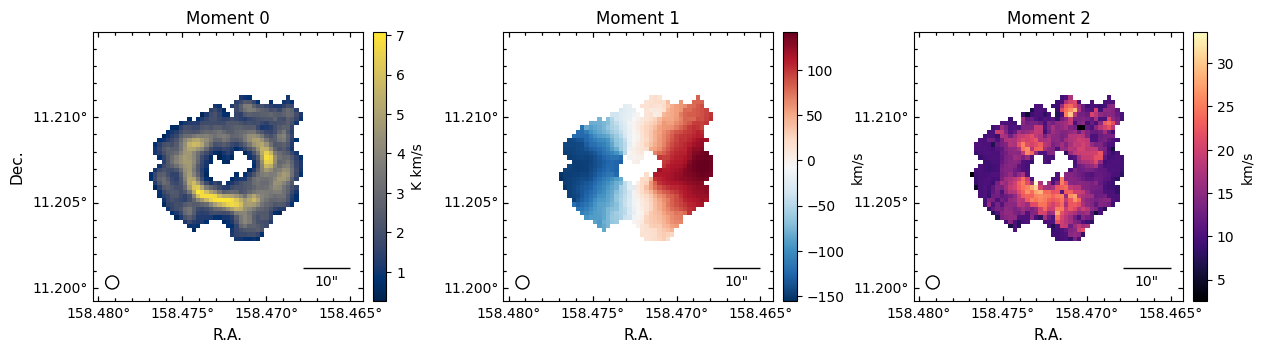

In [10]:
# -------------------------------------------------------------------
# Visualization of CO(1-0) moment maps for a single galaxy
# -------------------------------------------------------------------

# Target galaxy information
ID   = 588017703458111630    
NAME = data['source_name'][data['objID'] == 588017703458111630]
PROJ = data['project_code'][data['objID'] == 588017703458111630]

# Define moments, units, and color maps
moments = np.arange(0, 3)                      # Moment indices: 0, 1, 2
units   = ['K km/s', 'km/s', 'km/s']           # Units for each moment map
cmaps   = ['cividis', 'RdBu_r', 'magma']       # Colormaps for display

# Create figure
fig = plt.figure(figsize=(15, 3.5))

# Loop through moment maps
for m, unit, cmap in zip(moments, units, cmaps):

    # Load data
    imagename = f'./{ID}_12m_co10_strict_mom{m}.fits'
    moment = fits.getdata(imagename)
    header = fits.getheader(imagename)
    wcs = WCS(header)

    # Set up subplot with WCS projection
    ax = plt.subplot(131 + m, projection=wcs)
    ax.set_title(f'Moment {m}', fontsize=12)

    # Prepare data for plotting
    mom = moment.copy()
    mom[mom <= 0] = np.nan
    if m == 1:
        # Subtract mean velocity from moment 1 maps
        mom -= np.nanmean(mom)

    # Display the moment map
    out = ax.imshow(mom, origin='lower', cmap=cmap)
    plt.colorbar(out, label=unit, pad=0.03)
    
    # Add beam and scale bar overlays
    add_beam(ax, header, fill=False, color='k')
    add_scalebar(ax, 10/3600, label='10"')
        
    # Coordinate formatting
    dec = ax.coords[0]
    ra  = ax.coords[1]

    # Axis labels
    dec.set_axislabel('R.A.', fontsize=11)
    if m == 0:
        ra.set_axislabel('Dec.', fontsize=11)
    else:
        ra.set_axislabel(' ', fontsize=11)

    # Tick label formatting
    dec.set_major_formatter('d.ddd')
    ra.set_major_formatter('d.ddd')
    dec.set_ticklabel(exclude_overlapping=True)
    ra.set_ticklabel(exclude_overlapping=True)

    # Minor tick configuration
    dec.display_minor_ticks(True)
    ra.display_minor_ticks(True)
    dec.set_minor_frequency(5)
    ra.set_minor_frequency(5)

    # Tick direction and style
    ax.tick_params(axis='both', which='both', direction='in')

plt.show()


## 4. Making higher-order products

In this section, I demonstrate how to combine the data products included in the SALVAGE catalogues into higher order products such as gas fraction and star formation efficiency. Be careful with upper and lower limits when the CO is not detected at 5 sigma.

In [11]:
# -------------------------------------------------------------------
# Compute derived quantities: gas fractions, efficiencies, and sSFRs
# -------------------------------------------------------------------
# This section computes f_gas, SFE, and sSFR for inner, outer, and total
# regions, as well as their upper/lower limits and “master” versions
# that substitute limits for low-S/N detections.
# -------------------------------------------------------------------

# ===================================================================
# GAS FRACTIONS (f_gas = M_H2 / M_star)
# ===================================================================

data['fgas_total'] = 10**data['MH2_total'] / 10**data['mstar_total']
data['fgas_inner'] = 10**data['MH2_inner'] / 10**data['mstar_inner']
data['fgas_outer'] = 10**data['MH2_outer'] / 10**data['mstar_outer']

# Upper limits for low-S/N or non-detections
data['fgas_total_uplim'] = 10**data['MH2_total_uplim'] / 10**data['mstar_total']
data['fgas_inner_uplim'] = 10**data['MH2_inner_uplim'] / 10**data['mstar_inner']
data['fgas_outer_uplim'] = 10**data['MH2_outer_uplim'] / 10**data['mstar_outer']

# ===================================================================
# STAR FORMATION EFFICIENCIES (SFE = SFR / M_H2)
# ===================================================================

data['sfe_total'] = 10**data['sfr_total'] / 10**data['MH2_total']
data['sfe_inner'] = 10**data['sfr_inner'] / 10**data['MH2_inner']
data['sfe_outer'] = 10**data['sfr_outer'] / 10**data['MH2_outer']

# Lower limits using H2 upper limits
data['sfe_total_lowlim'] = 10**data['sfr_total'] / 10**data['MH2_total_uplim']
data['sfe_inner_lowlim'] = 10**data['sfr_inner'] / 10**data['MH2_inner_uplim']
data['sfe_outer_lowlim'] = 10**data['sfr_outer'] / 10**data['MH2_outer_uplim']

# ===================================================================
# SPECIFIC STAR FORMATION RATES (sSFR = SFR / M_star in log-space)
# ===================================================================

data['ssfr_inner'] = data['sfr_inner'] - data['mstar_inner']
data['ssfr_outer'] = data['sfr_outer'] - data['mstar_outer']
data['ssfr_total'] = data['sfr_total'] - data['mstar_total']

# ===================================================================
# MASTER VALUES: Replace low-S/N measurements with limits
# ===================================================================
# These columns combine detections and limits for consistent plotting.

# I use S/N>5 to define a detection
SNR_thresh = 5

# Molecular gas masses (M_H2)
MH2_total_master = data['MH2_total'].copy()
MH2_total_master[data['Nsigma_total'] < 5] = data['MH2_total_uplim'][data['Nsigma_total'] < SNR_thresh]
data['MH2_total_master'] = MH2_total_master

MH2_inner_master = data['MH2_inner'].copy()
MH2_inner_master[data['Nsigma_inner'] < 5] = data['MH2_inner_uplim'][data['Nsigma_inner'] < SNR_thresh]
data['MH2_inner_master'] = MH2_inner_master

MH2_outer_master = data['MH2_outer'].copy()
MH2_outer_master[data['Nsigma_outer'] < 5] = data['MH2_outer_uplim'][data['Nsigma_outer'] < SNR_thresh]
data['MH2_outer_master'] = MH2_outer_master

# Gas fractions (f_gas)
fgas_total_master = data['fgas_total'].copy()
fgas_total_master[data['Nsigma_total'] < 5] = data['fgas_total_uplim'][data['Nsigma_total'] < SNR_thresh]
data['fgas_total_master'] = fgas_total_master

fgas_inner_master = data['fgas_inner'].copy()
fgas_inner_master[data['Nsigma_inner'] < 5] = data['fgas_inner_uplim'][data['Nsigma_inner'] < SNR_thresh]
data['fgas_inner_master'] = fgas_inner_master

fgas_outer_master = data['fgas_outer'].copy()
fgas_outer_master[data['Nsigma_outer'] < 5] = data['fgas_outer_uplim'][data['Nsigma_outer'] < SNR_thresh]
data['fgas_outer_master'] = fgas_outer_master

# Star formation efficiencies (SFE)
sfe_total_master = data['sfe_total'].copy()
sfe_total_master[data['Nsigma_total'] < 5] = data['sfe_total_lowlim'][data['Nsigma_total'] < SNR_thresh]
data['sfe_total_master'] = sfe_total_master 

sfe_inner_master = data['sfe_inner'].copy()
sfe_inner_master[data['Nsigma_inner'] < 5] = data['sfe_inner_lowlim'][data['Nsigma_inner'] < SNR_thresh]
data['sfe_inner_master'] = sfe_inner_master

sfe_outer_master = data['sfe_outer'].copy()
sfe_outer_master[data['Nsigma_outer'] < 5] = data['sfe_outer_lowlim'][data['Nsigma_outer'] < SNR_thresh]
data['sfe_outer_master'] = sfe_outer_master


## 5. Using the semi-resolved products for science

In this section, I combine the SALVAGE products to show the three key scaling relations: the star-forming main sequence (SFMS), the molecular gas main sequence (MGMS), and the Kennicutt-Schmidt relation (KS).

In [12]:
# Create a mask for the sample used in this plot. 
# Namely, select only galaxies that pass QA, are not viewed edge-on, and have global detections.

main_sample_mask = data['qa_flag'] == 0
main_sample_mask &= data['edgeon_flag']==0
main_sample_mask &= (data['Nsigma_total'] > 5)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


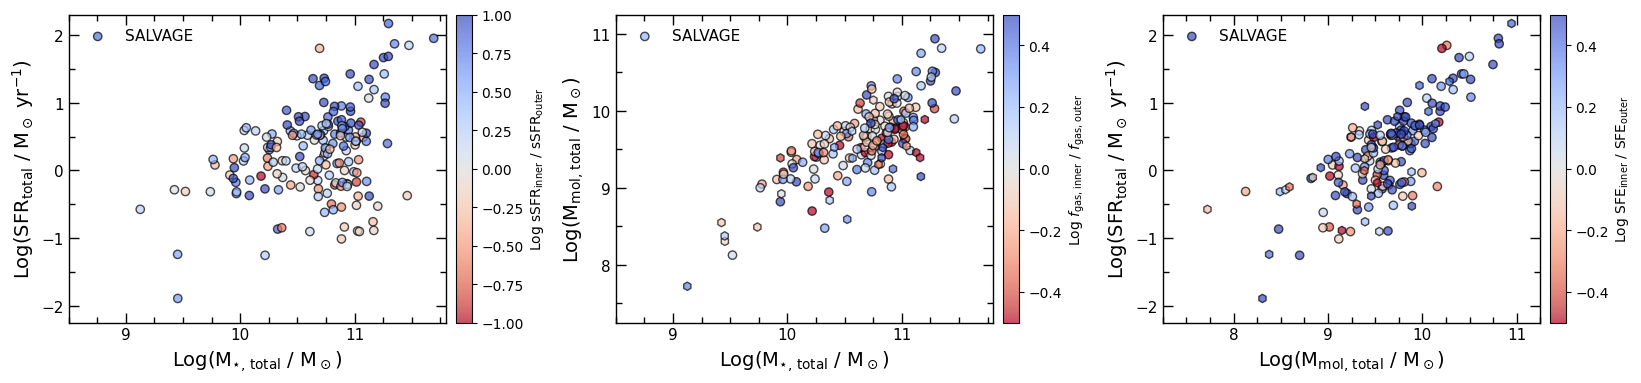

In [13]:
# -------------------------------------------------------------------
# Multi-panel comparison of global galaxy properties from SALVAGE
# -------------------------------------------------------------------
# Each panel compares two integrated quantities (M*, SFR, Mmol),
# colored by the ratio of inner/outer galaxy properties (sSFR, fgas, SFE).
# -------------------------------------------------------------------

# Create a 3-row figure layout
fig, [ax, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 4))

# ===================================================================
# PANEL 1: SFMS -- Star formation rate vs stellar mass
# Color: log(sSFR_inner / sSFR_outer)
# ===================================================================

# Plot the SFMS
out = ax.scatter(data['mstar_total'][main_sample_mask], data['sfr_total'][main_sample_mask], c = (data['ssfr_inner'] - data['ssfr_outer'])[main_sample_mask], alpha = 0.7, label = 'SALVAGE', edgecolors = 'k', cmap = 'coolwarm_r', vmin = -1, vmax = 1)
plt.colorbar(out, label = 'Log sSFR$_\\text{inner}$ / sSFR$_\\text{outer}$', pad = 0.022)

ax.scatter(data['mstar_total'][main_sample_mask][~(data['sfe_outer_master'][main_sample_mask] > 0)], data['sfr_total'][main_sample_mask][~(data['sfe_outer_master'][main_sample_mask] > 0)], color='royalblue', alpha=0.7, edgecolors='k')

# Axis labels
ax.set_ylabel('Log(SFR$_\\text{total}$ / M$_\\odot$ yr$^{-1}$)', fontsize=14)
ax.set_xlabel('Log(M$_{\\star\\text{, total}}$ / M$_\\odot$)', fontsize=14)

# Axis ticks
ax.set_xticks(np.arange(4, 14, 1))
ax.set_xticks(np.arange(4, 14, 0.25), minor=True)
ax.set_yticks(np.arange(-5, 4, 1))
ax.set_yticks(np.arange(-5, 4, 0.5), minor=True)

# Axis limits
ax.set_xlim(8.5, 11.8)
ax.set_ylim(-2.25, 2.3)

# ===================================================================
# PANEL 2: MGMS -- Molecular gas mass vs stellar mass
# Color: log(f_gas, inner / f_gas, outer)
# ===================================================================

# Plot the MGMS
out = ax2.scatter(data['mstar_total'][main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], data['MH2_total_master'][main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], c = np.log10(data['fgas_inner_master']/data['fgas_outer_master'])[main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], alpha = 0.7, edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5, label = 'SALVAGE')
plt.colorbar(out, label = 'Log $f_\\text{gas, inner}$ / $f_\\text{gas, outer}$', pad = 0.022)

# Plot points with unconstrained colour bar values as hexagons
ax2.scatter(data['mstar_total'][main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], data['MH2_total_master'][main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], c = np.log10(data['fgas_inner_master']/data['fgas_outer_master'])[main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], alpha = 0.7, edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5, marker = 'h')
ax2.scatter(data['mstar_total'][main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], data['MH2_total_master'][main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], c = np.log10(data['fgas_inner_master']/data['fgas_outer_master'])[main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], alpha = 0.7, edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5, marker = 'h')

# Axis labels
ax2.set_ylabel('Log(M$_\\text{mol, total}$ / M$_\\odot$)', fontsize=14)
ax2.set_xlabel('Log(M$_{\\star\\text{, total}}$ / M$_\\odot$)', fontsize=14)

# Axis ticks
ax2.set_xticks(np.arange(4, 14, 1))
ax2.set_xticks(np.arange(4, 14, 0.25), minor=True)
ax2.set_yticks(np.arange(6, 12, 1))
ax2.set_yticks(np.arange(6, 12, 0.5), minor=True)

# Axis limits
ax2.set_xlim(8.5, 11.8)
ax2.set_ylim(7.25, 11.25)

# ===================================================================
# PANEL 3: KS -- Star formation rate vs molecular gas mass
# Color: log(SFE_inner / SFE_outer)
# ===================================================================

# Plot the KS
out = ax3.scatter(data['MH2_total_master'][main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], data['sfr_total'][main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], c = np.log10(data['sfe_inner_master'] / data['sfe_outer_master'])[main_sample_mask][(data['Nsigma_inner'][main_sample_mask]>5) & (data['Nsigma_outer'][main_sample_mask]>5)], alpha = 0.7, label = 'SALVAGE', edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5)
plt.colorbar(out, label = 'Log SFE$_\\text{inner}$ / SFE$_\\text{outer}$', pad = 0.022)

ax3.scatter(data['MH2_total_master'][main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], data['sfr_total'][main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], c = np.log10(data['sfe_inner_master'] / data['sfe_outer_master'])[main_sample_mask][data['Nsigma_inner'][main_sample_mask]<5], alpha = 0.7, edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5, marker = 'h')
ax3.scatter(data['MH2_total_master'][main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], data['sfr_total'][main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], c = np.log10(data['sfe_inner_master'] / data['sfe_outer_master'])[main_sample_mask][data['Nsigma_outer'][main_sample_mask]<5], alpha = 0.7, edgecolors = 'k', cmap = 'coolwarm_r', vmin = -0.5, vmax = 0.5, marker = 'h')
ax3.scatter(data['MH2_total_master'][main_sample_mask][~(data['sfe_outer_master'][main_sample_mask]>0)], data['sfr_total'][main_sample_mask][~(data['sfe_outer_master'][main_sample_mask]>0)], color = 'royalblue', alpha = 0.7, edgecolors = 'k', marker = 'h')

# Axis labels
ax3.set_ylabel('Log(SFR$_\\text{total}$ / M$_\\odot$ yr$^{-1}$)', fontsize=14)
ax3.set_xlabel('Log(M$_\\text{mol, total}$ / M$_\\odot$)', fontsize=14)

# Axis ticks
ax3.set_xticks(np.arange(4, 14, 1))
ax3.set_xticks(np.arange(4, 14, 0.25), minor=True)
ax3.set_yticks(np.arange(-5, 4, 1))
ax3.set_yticks(np.arange(-5, 4, 0.5), minor=True)

# Axis limits
ax3.set_xlim(7.25, 11.25)
ax3.set_ylim(-2.25, 2.3)

# ===================================================================
# SHARED STYLING: Apply consistent visual formatting across panels
# ===================================================================

for AX in [ax, ax2, ax3]:

    AX.legend(fancybox = True, fontsize = 11, frameon = False, loc = 'upper left')

    AX.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
    AX.tick_params(axis = 'both', which = 'major', length = 7)
    AX.tick_params(axis = 'both', which = 'minor', length = 4)
    
    for axis in ['top','bottom','left','right']:
        AX.spines[axis].set_linewidth(1.)

plt.show()

### Contact

If you have any questions or comments, please do not hesitate to reach out. Up-to-date contact info will be available on my website: sj-wilkinson.github.io.

Happy SALVAGE-ing!